# Imports

In [119]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
#from skmultilearn.adapt import MLkNN
#import multilabel_knn as mlk
import re
import string
import nltk
from tqdm import tqdm #to show progress bar

In [120]:
og_data_df = pd.DataFrame(pd.read_excel("Desktop/CMU/Ind_Study/Responses.xlsx"))

In [121]:
new_data_df = pd.DataFrame(pd.read_excel("Desktop/CMU/Ind_Study/Responses_GPT.xlsx"))

In [122]:
og_data_df.head(5)

,Profile Bio / Statement of Entrepreneur Background (Experience),"What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?",Bio Labels,Problem Labels
0,"While in college, I had the opportunity to wor...",One of the biggest early challenges that we fa...,"College entrepreneurship, Minimum viable produ...","Startup transition, Young team, Small startup,..."
1,My name is *****. I am a software engineer and...,I am currently experiencing the challenge of t...,"Software, Technology","Young team, Lacks experience, Minimum viable p..."
2,"I have worked for several tech startups, most ...",I would say loneliness and mental health are k...,"Software, Technology, Video game, Commercializ...","Lonely, Mental health, Lacks support"
3,"8 years of sales, entrepreneur at heart.\nGrad...",I’m a visionary so I love all of the product d...,"Sales, Marketing","Startup finance, Finding investors, Business law"
4,Founded natural skincare company\nAcquired sma...,Staffing issues\nTech Disparity in multi gener...,"Skincare, Coffee, Business, Consulting","Staffing issues, Workforce lacks knowledge, La..."


In [123]:
new_data_df.head(5)

,Profile Bio / Statement of Entrepreneur Background (Experience),Original Bio statement (before refactoring),"What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?",Original Problem statement (before refactoring),Bio Labels,Problem Labels,Bio Query in ChatGPT,Problem Query in ChatGPT,Real data influence
0,I have founded a medical technology company ca...,Here is a potential entrepreneurial background...,I don’t come from a very business savvy backgr...,Managing and overseeing a large team of employ...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent",Write the entrepreneurial background of a foun...,Write the problems of a founder of a medical c...,12
1,**** founded the restaurant Nova. She worked f...,The founder of the medium-sized restaurant is ...,1) Dealing with the competition in an industry...,"Competition: In a crowded market, it can be di...","Restaurant, Middle startup experience","Competition, Investor acquisition, Vision, Tal...",Write the entrepreneurial background of a foun...,Write the problems of a founder of a restauran...,19
2,"4 years as a high school teacher, always have ...","The founder of our education company, Jane Doe...",I have always been more inclined to the academ...,"As the founder of a large education company, J...","Education, Small startup experience","Business law, Marketing, Competition",Write the entrepreneurial background of a foun...,Write the problems of a founder of a education...,5
3,Very limited,The founder of this ecommerce company began th...,"Competition, Scalability","As the founder of a large ecommerce company, s...",No startup experience,"Competition, Growth strategy",Write the entrepreneurial background of a foun...,Write the problems of a founder of a Ecommerce...,13
4,Designer who started a clothing company after ...,The founder of our small clothing company has ...,Starting a fashion company is very challenging...,"As the founder of a small clothing company, so...","Clothing, Fashion design, Small startup experi...","Lacking resources, Growth strategy, Culture, B...",Write the entrepreneurial background of a foun...,Write the problems of a founder of a clothing ...,10


In [124]:
new_data_df = new_data_df[['Profile Bio / Statement of Entrepreneur Background (Experience)', 'What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?', 'Bio Labels', 'Problem Labels']]

In [125]:
new_data_df.head(5)

,Profile Bio / Statement of Entrepreneur Background (Experience),"What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?",Bio Labels,Problem Labels
0,I have founded a medical technology company ca...,I don’t come from a very business savvy backgr...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
1,**** founded the restaurant Nova. She worked f...,1) Dealing with the competition in an industry...,"Restaurant, Middle startup experience","Competition, Investor acquisition, Vision, Tal..."
2,"4 years as a high school teacher, always have ...",I have always been more inclined to the academ...,"Education, Small startup experience","Business law, Marketing, Competition"
3,Very limited,"Competition, Scalability",No startup experience,"Competition, Growth strategy"
4,Designer who started a clothing company after ...,Starting a fashion company is very challenging...,"Clothing, Fashion design, Small startup experi...","Lacking resources, Growth strategy, Culture, B..."


In [126]:
og_data_df = og_data_df.rename(columns={"Profile Bio / Statement of Entrepreneur Background (Experience)": "Bio", "What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?": "Problem"})
new_data_df = new_data_df.rename(columns={"Profile Bio / Statement of Entrepreneur Background (Experience)": "Bio", "What problems/issues are you currently facing in your entrepreneurship space (i.e., things that founders face such as challenges with investors, cofounders, business stressors, business model, strategic partners, company culture, anxiety, sales, financing, etc.)?": "Problem"})

In [127]:
og_data_df.head(1)

,Bio,Problem,Bio Labels,Problem Labels
0,"While in college, I had the opportunity to wor...",One of the biggest early challenges that we fa...,"College entrepreneurship, Minimum viable produ...","Startup transition, Young team, Small startup,..."


In [128]:
new_data_df.head(1)

,Bio,Problem,Bio Labels,Problem Labels
0,I have founded a medical technology company ca...,I don’t come from a very business savvy backgr...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"


In [129]:
df = pd.concat([og_data_df, new_data_df])
df.head(3)

,Bio,Problem,Bio Labels,Problem Labels
0,"While in college, I had the opportunity to wor...",One of the biggest early challenges that we fa...,"College entrepreneurship, Minimum viable produ...","Startup transition, Young team, Small startup,..."
1,My name is *****. I am a software engineer and...,I am currently experiencing the challenge of t...,"Software, Technology","Young team, Lacks experience, Minimum viable p..."
2,"I have worked for several tech startups, most ...",I would say loneliness and mental health are k...,"Software, Technology, Video game, Commercializ...","Lonely, Mental health, Lacks support"


In [130]:
df.tail(3)

,Bio,Problem,Bio Labels,Problem Labels
20,Founded a tailoring company\n\n3 years in the ...,Managing company brand and reputation\n\nAnxie...,"Tailoring, Small startup experience","Growth strategy, Talent, Business law, Culture"
21,Founder of nonprofit charity Savior’s Hands,Talent and Resource allocation,"Charity, Small startup experience","Talent, Resources"
22,In 2015 I founded a data company that allows c...,Managing the security challenges that come wit...,"Data, Middle startup experience","Security, Business law, Growth strategy"


# Initial Plotting before further data expansion

In [131]:
bio_labels = df['Bio Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, bio_labels[i].split(', '))
bio_labels = new
bio_labels.shape

bio_unique, bio_counts = np.unique(bio_labels, return_counts=True)

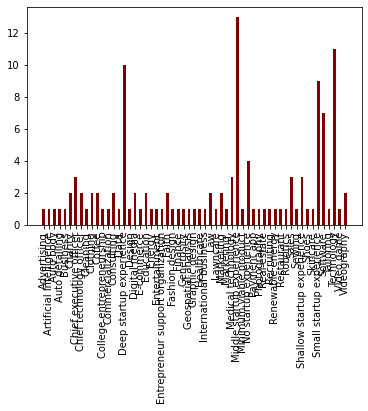

In [132]:
plt.bar(bio_unique, bio_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [133]:
prob_labels = df['Problem Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, prob_labels[i].split(', '))
prob_labels = new
prob_labels.shape

prob_unique, prob_counts = np.unique(prob_labels, return_counts=True)

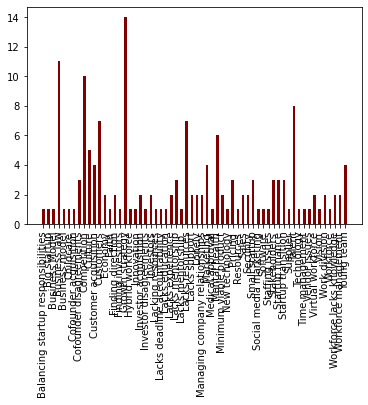

In [134]:
plt.bar(prob_unique, prob_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [135]:
#Plotting the distribution of label count for bios

bio_labels = df['Bio Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, len(bio_labels[i].split(', ')))
bio_labels = new
bio_labels.shape

bio_count_unique, bio_count_counts = np.unique(bio_labels, return_counts=True)

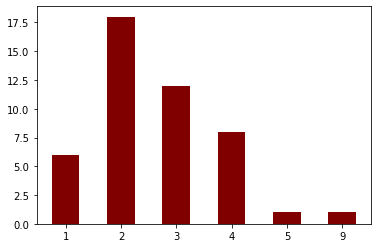

In [136]:
plt.bar(bio_count_unique, bio_count_counts, color ='maroon',
        width = 0.5)
plt.show()

In [137]:
#Plotting the distribution of label count for probs

prob_labels = df['Problem Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, len(prob_labels[i].split(', ')))
prob_labels = new
prob_labels.shape

prob_count_unique, prob_count_counts = np.unique(prob_labels, return_counts=True)

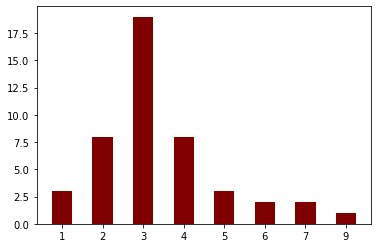

In [138]:
plt.bar(prob_count_unique, prob_count_counts, color ='maroon',
        width = 0.5)

plt.show()

# Creating synthetic data

### Data Augmentation through Synonym Replacement, Random Insertion, Random Swap, and Random Deletion

In [70]:
import random
from random import shuffle
random.seed(1)

#stop words list
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself',\
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', \
              'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', \
              'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', \
              'have', 'has', 'had', 'having', 'do', 'does', 'did','doing', 'a', 'an', 'the', 'and', 'but', \
              'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', \
              'against', 'between','into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', \
              'from', 'up', 'down', 'in','out', 'on', 'off', 'over', 'under', 'again', 'further', \
              'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', \
              'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', \
              'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', '']

#cleaning up text
import re
def get_only_chars(line):

    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line

########################################################################
# Synonym replacement
# Replace n words in the sentence with synonyms from wordnet
########################################################################

#for the first time you use wordnet
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet 

def synonym_replacement(words, n):
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            #print("replaced", random_word, "with", synonym)
            num_replaced += 1
        if num_replaced >= n: #only replace up to n words
            break

    #necessary
    sentence = ' '.join(new_words)
    new_words = sentence.split(' ')

    return new_words

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

########################################################################
# Random deletion
# Randomly delete words from the sentence with probability p
########################################################################

def random_deletion(words, p):

    #obviously, if there's only one word, don't delete it
    if len(words) == 1:
        return words

    #randomly delete words with probability p
    new_words = []
    for word in words:
        r = random.uniform(0, 1)
        if r > p:
            new_words.append(word)

    #if you end up deleting all words, just return a random word
    if len(new_words) == 0:
        rand_int = random.randint(0, len(words)-1)
        return [words[rand_int]]

    return new_words

########################################################################
# Random swap
# Randomly swap two words in the sentence n times
########################################################################

def random_swap(words, n):
    new_words = words.copy()
    for _ in range(n):
        new_words = swap_word(new_words)
    return new_words

def swap_word(new_words):
    random_idx_1 = random.randint(0, len(new_words)-1)
    random_idx_2 = random_idx_1
    counter = 0
    while random_idx_2 == random_idx_1:
        random_idx_2 = random.randint(0, len(new_words)-1)
        counter += 1
        if counter > 3:
            return new_words
    new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
    return new_words

########################################################################
# Random insertion
# Randomly insert n words into the sentence
########################################################################

def random_insertion(words, n):
    new_words = words.copy()
    for _ in range(n):
        add_word(new_words)
    return new_words

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = get_synonyms(random_word)
        counter += 1
        if counter >= 10:
            return
    random_synonym = synonyms[0]
    random_idx = random.randint(0, len(new_words)-1)
    new_words.insert(random_idx, random_synonym)

########################################################################
# main data augmentation function
########################################################################

def eda(sentence, alpha_sr=0.1, alpha_ri=0.1, alpha_rs=0.1, p_rd=0.1, num_aug=9):
    sentence = get_only_chars(sentence)
    words = sentence.split(' ')
    words = [word for word in words if word is not '']
    num_words = len(words)

    augmented_sentences = []
    num_new_per_technique = int(num_aug/4)+1

    #sr
    if (alpha_sr > 0):
        n_sr = max(1, int(alpha_sr*num_words))
        for _ in range(num_new_per_technique):
            a_words = synonym_replacement(words, n_sr)
            augmented_sentences.append(' '.join(a_words))

    #ri
    if (alpha_ri > 0):
        n_ri = max(1, int(alpha_ri*num_words))
        for _ in range(num_new_per_technique):
            a_words = random_insertion(words, n_ri)
            augmented_sentences.append(' '.join(a_words))

    #rs
    if (alpha_rs > 0):
        n_rs = max(1, int(alpha_rs*num_words))
        for _ in range(num_new_per_technique):
            a_words = random_swap(words, n_rs)
            augmented_sentences.append(' '.join(a_words))

    #rd
    if (p_rd > 0):
        for _ in range(num_new_per_technique):
            a_words = random_deletion(words, p_rd)
            augmented_sentences.append(' '.join(a_words))

    augmented_sentences = [get_only_chars(sentence) for sentence in augmented_sentences]
    shuffle(augmented_sentences)

    #trim so that we have the desired number of augmented sentences
    if num_aug >= 1:
        augmented_sentences = augmented_sentences[:num_aug]
    else:
        keep_prob = num_aug / len(augmented_sentences)
        augmented_sentences = [s for s in augmented_sentences if random.uniform(0, 1) < keep_prob]

    #append the original sentence
    augmented_sentences.append(sentence)

    return augmented_sentences

<>:163: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:163: SyntaxWarning: "is not" with a literal. Did you mean "!="?
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacobriviere/nltk_data...
<ipython-input-70-1171ee637728>:163: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not '']


In [71]:
#number of augmented sentences to generate per original sentence
num_aug = 10 #default

#how much to replace each word by synonyms
alpha_sr = 0.1#default

#how much to insert new words that are synonyms
alpha_ri = 0.1#default

#how much to swap words
alpha_rs = 0.1#default

#how much to delete words
alpha_rd = 0.1#default


#generate more data with standard augmentation
def gen_eda(data, alpha_sr, alpha_ri, alpha_rs, alpha_rd, num_aug=9):
            
    gen_bio_df = pd.DataFrame()
    gen_prob_df = pd.DataFrame()
            
    for index, row in data.iterrows():
        bio_label = row['Bio Labels']
        bio_text = row['Bio']
        prob_label = row['Problem Labels']
        prob_text = row['Problem']
        aug_bios = eda(bio_text, alpha_sr, alpha_ri, alpha_rs, alpha_rd, num_aug)
        aug_probs = eda(prob_text, alpha_sr, alpha_ri, alpha_rs, alpha_rd, num_aug)
        
        for aug_bio in aug_bios:
            gen_bio_df = gen_bio_df.append({'Bio': aug_bio, 'Bio Labels': bio_label}, ignore_index=True)
            
            
        for aug_prob in aug_probs:
            gen_prob_df = gen_prob_df.append({'Problem': aug_prob, 'Problem Labels': prob_label}, ignore_index=True)
            
    return [gen_bio_df, gen_prob_df]



## New fix to avoid overfitting

In [139]:
df = df.sample(frac=1).reset_index(drop=True)
df_train, df_test = train_test_split(df, test_size=0.5)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [140]:
safety = df_train.copy(deep=True)
#Small generation, make a total of ~250
small_bio_df, small_prob_df = gen_eda(safety, 0.1, 0.1, 0.1, 0.1, 10)

#Middle generation, make a total of ~500
mid_bio_df, mid_prob_df = gen_eda(safety, 0.2, 0.2, 0.2, 0.2, 20)

#Large generation, make a total of ~1000
big_bio_df, big_prob_df = gen_eda(safety, 0.4, 0.4, 0.4, 0.4, 40)



In [141]:
small_df = pd.concat([small_bio_df, small_prob_df], axis=1, join='inner')
small_df = small_df[['Bio', 'Problem', 'Bio Labels', 'Problem Labels']]
small_df.head(5)

,Bio,Problem,Bio Labels,Problem Labels
0,i have founded a medical engineering science c...,i dont come from a very business get the pictu...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
1,i have constitute a medical technology company...,i dont come from a very business savvy backgro...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
2,i have founded a medical technology company ca...,i dont come from a very business savvy desktop...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
3,i have founded a medical technology company ca...,i dont come caller from a very business savvy ...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
4,i have founded a animation medical technology ...,i dont come from a very business savvy backgro...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"


In [142]:
mid_df = pd.concat([mid_bio_df, mid_prob_df], axis=1, join='inner')
mid_df = mid_df[['Bio', 'Problem', 'Bio Labels', 'Problem Labels']]
mid_df.head(5)

,Bio,Problem,Bio Labels,Problem Labels
0,i have base a medical technology company hollo...,i dont come in from a very business savvy back...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
1,i have founded a medical applied science compa...,i dont fall from a very job savvy background a...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
2,i have founded a medical technology companions...,i dont come up from a very clientele discernme...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
3,i have founded a medical engineering company c...,i dont semen from a very business sector savvy...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
4,i have founded a medical engineering science c...,i dont come from a very business enterprise co...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"


In [143]:
big_df = pd.concat([big_bio_df, big_prob_df], axis=1, join='inner')
big_df = big_df[['Bio', 'Problem', 'Bio Labels', 'Problem Labels']]
big_df.head(5)

,Bio,Problem,Bio Labels,Problem Labels
0,i have plant a medical technology keep company...,i dont total from a very clientele get the pic...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
1,i have found a health check applied science co...,i dont make out from a very line comprehend do...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
2,i have set up a aesculapian applied science fe...,i dont seminal fluid from a very business sect...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
3,i have found a checkup technology caller calle...,i dont arrive from a very byplay get the pictu...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"
4,i have found a medical engineering ships compa...,i dont come in from a very business enterprise...,"Medical technology, Technology, Middle startup...","Stakeholders, Competition, Business law, Talent"


In [144]:
print(f'Small df dimensions: rows: {len(small_df)}, cols: {len(small_df.columns)}')
print(f'Middle df dimensions: rows: {len(mid_df)}, cols: {len(mid_df.columns)}')
print(f'Big df dimensions: rows: {len(big_df)}, cols: {len(big_df.columns)}')

Small df dimensions: rows: 253, cols: 4
Middle df dimensions: rows: 483, cols: 4
Big df dimensions: rows: 943, cols: 4


In [178]:
#Shuffle each of the datasets
small_df = small_df.sample(frac=1).reset_index(drop=True)
mid_df = mid_df.sample(frac=1).reset_index(drop=True)
big_df = big_df.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)



# Cleaning created data

In [179]:
#below option is not necessary everytime. only if stopword resource is not found then run below command
#nltk.download('stopwords')

In [180]:
#Initial Preprocessing steps

#Removing any special characters that may cause issues in our model
def cleanpunc(sentence): #to remove special characters
    pattern = r'[' + string.punctuation + ']'
    cleaned = re.sub(pattern, '', sentence)
    return cleaned
                   
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
#initializing the snowball stemmer that will convert the words to their root meaning
sno=nltk.stem.SnowballStemmer('english')

In [181]:
#Applying more preprocessing steps

def textPrep(data):
    i=0
    str1=' '
    final_string=[]
    s=''
    for sent in tqdm(data.values):
        filtered_sent=[]
        for w in sent.split():
            for cleaned_words in cleanpunc(w).split():
                if((cleaned_words.isalpha())&(len(cleaned_words)>2)): #keeping only english words
                    if(cleaned_words.lower() not in stop):
                        s=(sno.stem(cleaned_words.lower())).encode("utf-8") #stemming
                        filtered_sent.append(s)
                    else:
                        continue
                else:
                    continue
        str1=b" ".join(filtered_sent)
        final_string.append(str1)
        i+=1
    return final_string

#test
df_test['Cleaned Bio'] = textPrep(df_test['Bio'])
df_test['Cleaned Bio'] = df_test['Cleaned Bio'].str.decode("utf-8")

df_test['Cleaned Problem'] = textPrep(df_test['Problem'])
df_test['Cleaned Problem'] = df_test['Cleaned Problem'].str.decode("utf-8")

#small train
small_df['Cleaned Bio'] = textPrep(small_df['Bio'])
small_df['Cleaned Bio'] = small_df['Cleaned Bio'].str.decode("utf-8")

small_df['Cleaned Problem'] = textPrep(small_df['Problem'])
small_df['Cleaned Problem'] = small_df['Cleaned Problem'].str.decode("utf-8")

#mid train
mid_df['Cleaned Bio'] = textPrep(mid_df['Bio'])
mid_df['Cleaned Bio'] = mid_df['Cleaned Bio'].str.decode("utf-8")

mid_df['Cleaned Problem'] = textPrep(mid_df['Problem'])
mid_df['Cleaned Problem'] = mid_df['Cleaned Problem'].str.decode("utf-8")

#big train
big_df['Cleaned Bio'] = textPrep(big_df['Bio'])
big_df['Cleaned Bio'] = big_df['Cleaned Bio'].str.decode("utf-8")

big_df['Cleaned Problem'] = textPrep(big_df['Problem'])
big_df['Cleaned Problem'] = big_df['Cleaned Problem'].str.decode("utf-8")

100%|██████████| 943/943 [00:00<00:00, 956.93it/s] 


# Making Graphs with synthetic data

## Small data

In [149]:
bio_labels = small_df['Bio Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, bio_labels[i].split(', '))
bio_labels = new
bio_labels.shape

bio_unique, bio_counts = np.unique(bio_labels, return_counts=True)

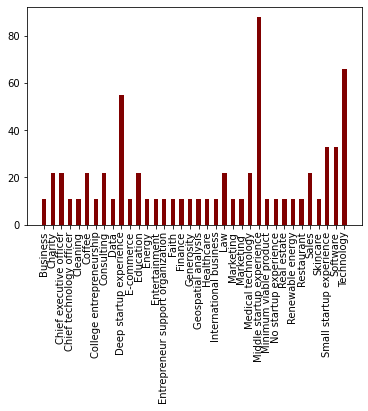

In [150]:
plt.bar(bio_unique, bio_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [151]:
prob_labels = small_df['Problem Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, prob_labels[i].split(', '))
prob_labels = new
prob_labels.shape

prob_unique, prob_counts = np.unique(prob_labels, return_counts=True)

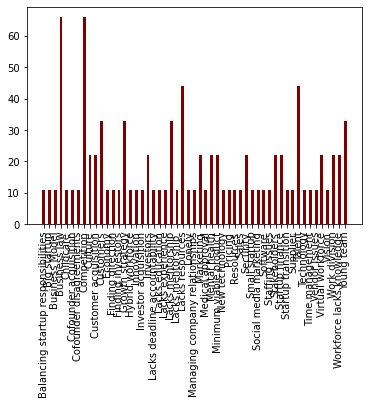

In [152]:
plt.bar(prob_unique, prob_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [153]:
#Plotting the distribution of label count for bios

bio_labels = small_df['Bio Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, len(bio_labels[i].split(', ')))
bio_labels = new
bio_labels.shape

bio_count_unique, bio_count_counts = np.unique(bio_labels, return_counts=True)

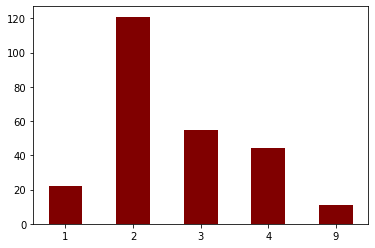

In [154]:
plt.bar(bio_count_unique, bio_count_counts, color ='maroon',
        width = 0.5)
plt.show()

In [155]:
#Plotting the distribution of label count for probs

prob_labels = small_df['Problem Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, len(prob_labels[i].split(', ')))
prob_labels = new
prob_labels.shape

prob_count_unique, prob_count_counts = np.unique(prob_labels, return_counts=True)

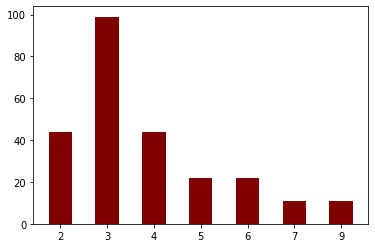

In [156]:
plt.bar(prob_count_unique, prob_count_counts, color ='maroon',
        width = 0.5)

plt.show()

## Mid data

In [157]:
bio_labels = mid_df['Bio Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, bio_labels[i].split(', '))
bio_labels = new
bio_labels.shape

bio_unique, bio_counts = np.unique(bio_labels, return_counts=True)

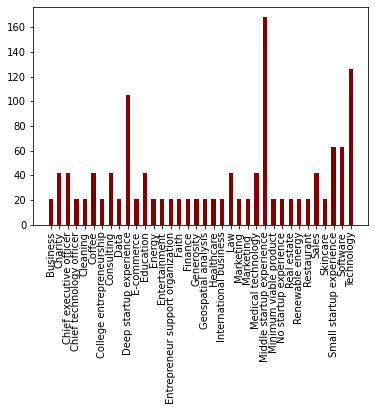

In [158]:
plt.bar(bio_unique, bio_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [159]:
prob_labels = mid_df['Problem Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, prob_labels[i].split(', '))
prob_labels = new
prob_labels.shape

prob_unique, prob_counts = np.unique(prob_labels, return_counts=True)

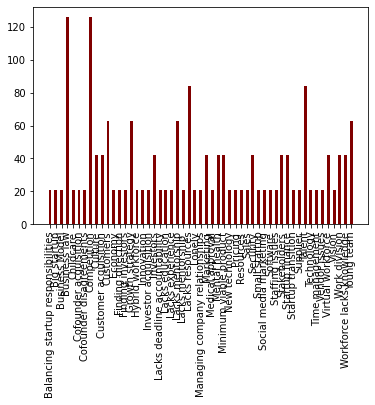

In [160]:
plt.bar(prob_unique, prob_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [161]:
#Plotting the distribution of label count for bios

bio_labels = mid_df['Bio Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, len(bio_labels[i].split(', ')))
bio_labels = new
bio_labels.shape

bio_count_unique, bio_count_counts = np.unique(bio_labels, return_counts=True)

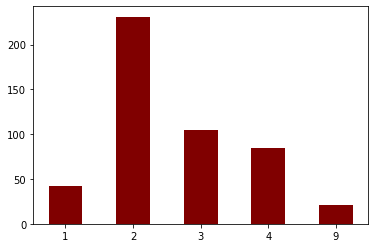

In [162]:
plt.bar(bio_count_unique, bio_count_counts, color ='maroon',
        width = 0.5)
plt.show()

In [163]:
#Plotting the distribution of label count for probs

prob_labels = mid_df['Problem Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, len(prob_labels[i].split(', ')))
prob_labels = new
prob_labels.shape

prob_count_unique, prob_count_counts = np.unique(prob_labels, return_counts=True)

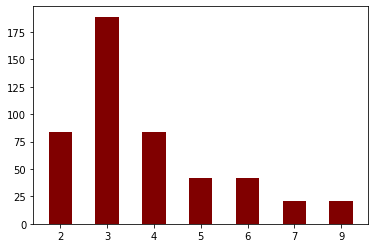

In [164]:
plt.bar(prob_count_unique, prob_count_counts, color ='maroon',
        width = 0.5)

plt.show()

## Big data

In [165]:
bio_labels = big_df['Bio Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, bio_labels[i].split(', '))
bio_labels = new
bio_labels.shape

bio_unique, bio_counts = np.unique(bio_labels, return_counts=True)

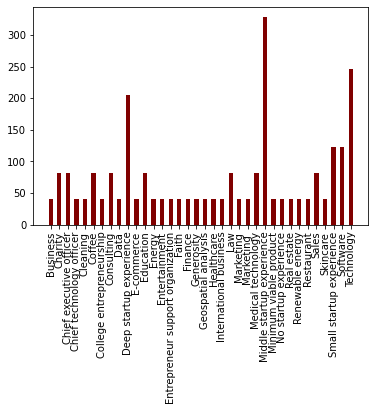

In [166]:
plt.bar(bio_unique, bio_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [167]:
prob_labels = big_df['Problem Labels'].to_numpy()
#bio_labels
new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, prob_labels[i].split(', '))
prob_labels = new
prob_labels.shape

prob_unique, prob_counts = np.unique(prob_labels, return_counts=True)

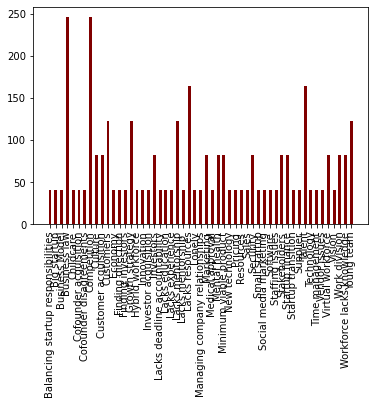

In [168]:
plt.bar(prob_unique, prob_counts, color ='maroon',
        width = 0.5)
 
plt.xticks(rotation=90)
plt.show()

In [169]:
#Plotting the distribution of label count for bios

bio_labels = big_df['Bio Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(bio_labels)):
    new = np.append(new, len(bio_labels[i].split(', ')))
bio_labels = new
bio_labels.shape

bio_count_unique, bio_count_counts = np.unique(bio_labels, return_counts=True)

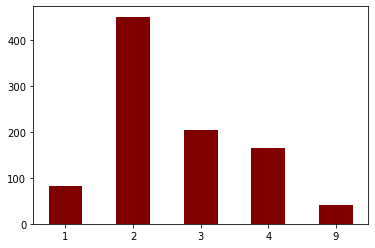

In [170]:
plt.bar(bio_count_unique, bio_count_counts, color ='maroon',
        width = 0.5)
plt.show()

In [171]:
#Plotting the distribution of label count for probs

prob_labels = big_df['Problem Labels'].to_numpy()

new = np.array([], dtype=str)
for i in range(len(prob_labels)):
    new = np.append(new, len(prob_labels[i].split(', ')))
prob_labels = new
prob_labels.shape

prob_count_unique, prob_count_counts = np.unique(prob_labels, return_counts=True)

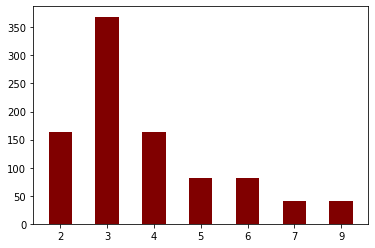

In [172]:
plt.bar(prob_count_unique, prob_count_counts, color ='maroon',
        width = 0.5)

plt.show()

In [183]:
#One-hot encoding the bio labels
df_test['Bio Encoded Labels'] = df['Bio Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=bio_unique), axis=0))

#One-hot encoding the probs labels
df_test['Problem Encoded Labels'] = df['Problem Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=prob_unique), axis=0))

#One-hot encoding the bio labels
small_df['Bio Encoded Labels'] = small_df['Bio Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=bio_unique), axis=0))

#One-hot encoding the probs labels
small_df['Problem Encoded Labels'] = small_df['Problem Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=prob_unique), axis=0))

#One-hot encoding the bio labels
mid_df['Bio Encoded Labels'] = mid_df['Bio Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=bio_unique), axis=0))

#One-hot encoding the probs labels
mid_df['Problem Encoded Labels'] = mid_df['Problem Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=prob_unique), axis=0))

#One-hot encoding the bio labels
big_df['Bio Encoded Labels'] = big_df['Bio Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=bio_unique), axis=0))

#One-hot encoding the probs labels
big_df['Problem Encoded Labels'] = big_df['Problem Labels'].apply(lambda x: np.sum(label_binarize(x.split(', '), classes=prob_unique), axis=0))

In [184]:
df_test.head(1)

,Bio,Problem,Bio Labels,Problem Labels,Cleaned Bio,Cleaned Problem,Bio Encoded Labels,Problem Encoded Labels
0,Very limited,"Competition, Scalability",No startup experience,"Competition, Growth strategy",limit,competit scalabl,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [185]:
small_df.head(1)

,Bio,Problem,Bio Labels,Problem Labels,Cleaned Bio,Cleaned Problem,Bio Encoded Labels,Problem Encoded Labels
0,i launch a consulting firm that works on a var...,the issues that face our company are as follow...,"Consulting, Middle startup experience","Culture, Growth strategy, Talent",launch consult firm work varieti technolog pro...,issu face compani follow challeng maintain sin...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."


In [186]:
mid_df.head(1)

,Bio,Problem,Bio Labels,Problem Labels,Cleaned Bio,Cleaned Problem,Bio Encoded Labels,Problem Encoded Labels
0,years of sales astatine entrepreneur at heart ...,im a visionary so i feeble love all of the pro...,"Sales, Marketing","Startup finance, Finding investors, Business law",year sale astatin entrepreneur heart graduat p...,visionari feebl love product design implement ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [187]:
big_df.head(1)

,Bio,Problem,Bio Labels,Problem Labels,Cleaned Bio,Cleaned Problem,Bio Encoded Labels,Problem Encoded Labels
0,is the founding father and chief operating off...,accession to exceedingly luxuriously network c...,"Deep startup experience, Software, Technology,...","Investors, Lacks resources, Lonely, Customer a...",found father chief oper offic flair class seas...,access exceed luxuri network charl frederick w...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ..."


# Exporting data to files

In [188]:
small_df.to_csv('Desktop/CMU/Ind_Study/small_train_1.csv')
mid_df.to_csv('Desktop/CMU/Ind_Study/mid_train_1.csv')
big_df.to_csv('Desktop/CMU/Ind_Study/big_train_1.csv')
df_test.to_csv('Desktop/CMU/Ind_Study/test_1.csv')